<a href="https://colab.research.google.com/github/plaban1981/Machinehack/blob/master/Airflight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Training data

## Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

#### Size of training set: 10683 records

#### Size of test set: 2671 records

**FEATURES:**

* Airline: The name of the airline.

* Date_of_Journey: The date of the journey

* Source: The source from which the service begins.

* Destination: The destination where the service ends.

* Route: The route taken by the flight to reach the destination.

* Dep_Time: The time when the journey starts from the source.

* Arrival_Time: Time of arrival at the destination.

* Duration: Total duration of the flight.

* Total_Stops: Total stops between the source and destination.

* Additional_Info: Additional information about the flight

* Price: The price of the ticket

In [11]:
from google.colab import files
files.upload()

Saving Test_set.xlsx to Test_set.xlsx


{'Test_set.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00\xe7\xb5f:\xfb\xb1\x01\x00/\x88\x0e\x00\x18\x00\x00\x00xl/worksheets/sheet1.xml\x8c\xbd\xcb\xb2\xed\xcaqe\xd9\xaf\xaf\xa0\xb1_\xc9\x857 \xa3\x94\x96:{\xef\x05\xa8UV\xaf>\x93\xba\x92h)\x912\x92\x99\xaa\xfa\xfb\xba<Y&\x9d1\xa7\xfb\x04z\x12G\x9c\x05\x84\xdf\xd8\x81\x18\xe1\xf1\xf8\xf5\x7f\xfe\x7f\xfe\xe5\x9f\x7f\xf1?~\xfa\xe3\x9f~\xf7\x87\xdf\xff\xf5/\x87\xff\xf4\xfa\xe5/~\xfa\xfdo\xff\xf0\xf7\xbf\xfb\xfd?\xfe\xf5/\xff\xaf\xff\xf3\xeb\x7f\xdd\x7f\xf9\x8b?\xfd\xf97\xbf\xff\xfb\xdf\xfc\xf3\x1f~\xff\xd3_\xff\xf2\xff\xfd\xe9O\xbf\xfc\xcf\x7f\xf3\xbf\xfc\xfa\xdf\xfe\xf0\xc7\xff\xf6\xa7\x7f\xfa\xe9\xa7?\xff\xe2\xe7\x1f\xf8\xfd\x9f\xfe\xfa\x97\xff\xf4\xe7?\xff\xeb_\xfd\xeaW\x7f\xfa\xed?\xfd\xf4/\xbf\xf9\xd3\x7f\xfa\xc3\xbf\xfe\xf4\xfb\x9f\xc9?\xfc\xe1\x8f\xff\xf2\x9b?\xff\xfc\xff\xfe\xf1\x1f\x7f\xf5\xa7\x7f\xfd\xe3O\xbf\xf9\xfb\xef\xff\xe8_\xfe\xf9W\xe3\xeb\xb5\xfe\xea_~\xf3\xbb\xdf\xff\xf2\x7f\xfe\xc2_\xfd\xf1\xc9o\xfc\xe1\x1f\x

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Training data

In [0]:
train_df=pd.read_excel('Data_Train.xlsx')


In [0]:
test_df = pd.read_excel('/content/Test_set.xlsx')

In [15]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Summary Statistics

In [16]:
train_df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


## Data Information

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Feature Engineering

In [0]:
train_df['Date_of_Journey'] = pd.to_datetime(train_df['Date_of_Journey'])

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null datetime64[ns]
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [0]:
train_df['Day'] = train_df['Date_of_Journey'].dt.day
train_df['Month'] = train_df['Date_of_Journey'].dt.month
train_df['Year'] = train_df['Date_of_Journey'].dt.year

In [30]:
train_df[['Date_of_Journey','Day','Month','Year']].head()

,Date_of_Journey,Day,Month,Year
0,2019-03-24,24,3,2019
1,2019-01-05,5,1,2019
2,2019-09-06,6,9,2019
3,2019-12-05,5,12,2019
4,2019-01-03,3,1,2019


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null datetime64[ns]
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
Day                10683 non-null int64
Month              10683 non-null int64
Year               10683 non-null int64
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 1.1+ MB


In [0]:
train_df['Arrival_Time'] = train_df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [36]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [49]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [46]:
train_df['Total_Stops'].mode().values[0]

'1 stop'

##Check for Null Values

In [44]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Route          1
Total_Stops    1
dtype: int64

## Imputing missing value for  Total_Stops attribute with mode of the attribute

In [0]:
train_df['Route'].fillna('Missing',inplace=True)

In [0]:
train_df['Total_Stops'] = train_df['Total_Stops'].fillna(train_df['Total_Stops'].mode().values[0])

In [48]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Route    1
dtype: int64

In [0]:
train_df['Total_Stops'] = train_df['Total_Stops'].replace('non-stop','0 stop')

In [0]:
train_df['Total_Stops'] = train_df['Total_Stops'].apply(lambda x : x.split(' ')[0]).astype('int')

In [54]:
train_df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [55]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                 int64
Additional_Info            object
Price                       int64
Day                         int64
Month                       int64
Year                        int64
dtype: object

In [0]:
train_df['Arrival_Hour'] = train_df['Arrival_Time'].apply(lambda x:x.split(':')[0]).astype('int')
train_df['Arrival_Minute'] = train_df['Arrival_Time'].apply(lambda x:x.split(':')[1]).astype('int')

In [57]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                 int64
Additional_Info            object
Price                       int64
Day                         int64
Month                       int64
Year                        int64
Arrival_Hour                int64
Arrival_Minute              int64
dtype: object

In [0]:
train_df['Dep_Hour'] = train_df['Dep_Time'].apply(lambda x:x.split(':')[0]).astype('int')
train_df['Dep_Minute'] = train_df['Dep_Time'].apply(lambda x:x.split(':')[1]).astype('int')

In [74]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                 int64
Additional_Info            object
Price                       int64
Day                         int64
Month                       int64
Year                        int64
Arrival_Hour                int64
Arrival_Minute              int64
Dep_Hour                    int64
Dep_Minute                  int64
dtype: object

In [78]:
train_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [68]:
len('BLR → BOM → IXC → DEL'.split('→ '))

4

In [0]:
train_df['Route_len'] = train_df['Route'].apply(lambda x: len(x.split('→ ')))

## Generating new features from Route

In [83]:
train_df['Route_len'].max()

6

In [0]:
for i in range(train_df['Route_len'].max()):
  col_name = 'Route_'+str(i+1)
  train_df[col_name] = train_df['Route'].str.split('→ ').str[i]

In [86]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                 int64
Additional_Info            object
Price                       int64
Day                         int64
Month                       int64
Year                        int64
Arrival_Hour                int64
Arrival_Minute              int64
Dep_Hour                    int64
Dep_Minute                  int64
Route_len                   int64
Route_1                    object
Route_2                    object
Route_3                    object
Route_4                    object
Route_5                    object
Route_6                    object
dtype: object

##Check for Null Values post Feature Engineering

In [87]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Route_2        1
Route_3     3492
Route_4     9117
Route_5    10637
Route_6    10682
dtype: int64

In [0]:
##fill missing values
train_df['Route_2'].fillna("None",inplace=True)
train_df['Route_3'].fillna("None",inplace=True)
train_df['Route_4'].fillna("None",inplace=True)
train_df['Route_5'].fillna("None",inplace=True)
train_df['Route_6'].fillna("None",inplace=True)

In [89]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

## Drop the base columns from which new column has been derived

In [90]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                 int64
Additional_Info            object
Price                       int64
Day                         int64
Month                       int64
Year                        int64
Arrival_Hour                int64
Arrival_Minute              int64
Dep_Hour                    int64
Dep_Minute                  int64
Route_len                   int64
Route_1                    object
Route_2                    object
Route_3                    object
Route_4                    object
Route_5                    object
Route_6                    object
dtype: object

In [91]:
train_df.shape

(10683, 25)

In [93]:
train_df = train_df.drop(['Route','Dep_Time','Arrival_Time','Route_len','Duration'],axis=1)
train_df.shape

(10683, 20)

In [0]:
train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [96]:
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Route_6            0
dtype: int64

In [0]:
cat_cols = [ col for col in train_df.columns if train_df[col].dtypes == 'O']

In [99]:
cat_cols

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4',
 'Route_5',
 'Route_6']

## Label Encoding Categorical values as these categories do not necessarily follow any order and have no specific weights associated

In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_cols:
  train_df[col] = lb.fit_transform(train_df[col])

In [101]:
train_df.dtypes

Airline            int64
Source             int64
Destination        int64
Total_Stops        int64
Additional_Info    int64
Price              int64
Day                int64
Month              int64
Year               int64
Arrival_Hour       int64
Arrival_Minute     int64
Dep_Hour           int64
Dep_Minute         int64
Route_1            int64
Route_2            int64
Route_3            int64
Route_4            int64
Route_5            int64
Route_6            int64
dtype: object

In [102]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,0,13,24,12,4,1
1,1,3,0,2,8,7662,5,1,2019,13,15,5,50,2,25,1,3,4,1
2,4,2,1,2,8,13882,6,9,2019,4,25,9,25,3,32,4,5,4,1
3,3,3,0,1,8,6218,5,12,2019,23,30,18,5,2,34,3,12,4,1
4,3,0,5,1,8,13302,3,1,2019,21,35,16,50,0,34,8,12,4,1


## Feature Selection 

In [0]:
X = train_df.drop('Price',axis=1)
y = train_df['Price']

In [0]:
x_corr = X.corr()

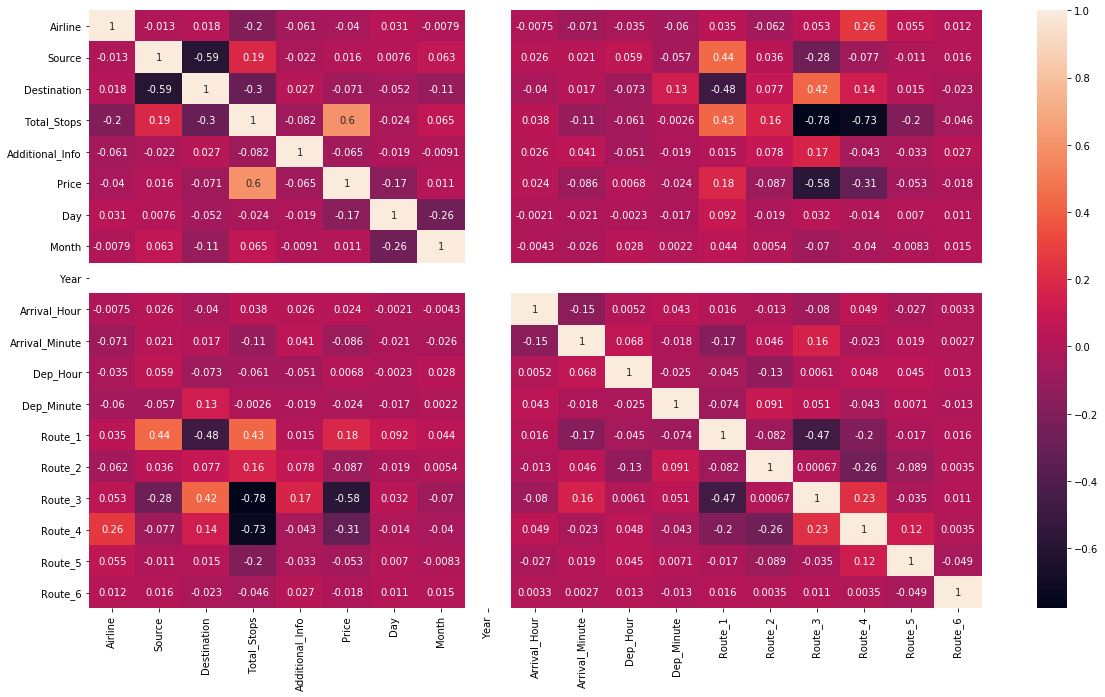

In [111]:
plt.figure(figsize=(20,11))
sns.heatmap(train_df.corr(),fmt='.2g',annot=True)

#### The above heatmap shows that the feature Year has no significance with respect to the predictors or the label.Hence can be dropped